In [1]:
import  os, sys, time

from    tqdm.notebook       import  tqdm, trange

import  numpy               as      np

import  matplotlib.pyplot   as      plt
from    IPython             import  display

import  kinetic              as      ck
from    kinetic.utils        import  *
from    kinetic.distribution import  *

### Generate the grid

In [2]:
max_t:      float       = 5.0
delta_t:    float       = 0.05
num_t:      int         = int(1 + (max_t + 0.1*delta_t)/delta_t)
arr_t:      np.ndarray  = np.linspace(0, max_t, num_t)

dim:        int         = 1

max_v:      float       = 10
num_v:      int         = 1 + 400
delta_v:    float       = (2*max_v) / (num_v-1)
_grid_v_1d: np.ndarray  = np.linspace(-max_v, max_v, num_v)
grid_v:     np.ndarray  = _grid_v_1d[:, None]

In [3]:
# Physical quantities
mean_density        = np.ones((1, 1))
mean_velocity       = np.zeros((1, dim))
mean_temperature    = np.ones((1, 1))

arr_f.shape=(1, 401)


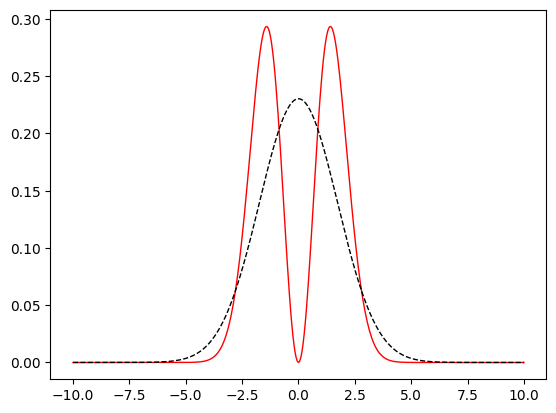

In [4]:
f_init = maxwellian_homogeneous(grid_v, mean_density, mean_velocity, mean_temperature)
f_init = f_init * (_grid_v_1d**2)
arr_f = f_init

_rho_init, _u_init, _T_init = compute_moments_homogeneous(f_init, grid_v)
_equi_init = maxwellian_homogeneous(grid_v, _rho_init, _u_init, _T_init)

print(f"{arr_f.shape=}")

plt.plot(grid_v.flatten(), f_init[0],      'r-',   linewidth=1)
plt.plot(grid_v.flatten(), _equi_init[0],  'k--',  linewidth=1)
plt.show()

### Multidimensional transport equation


0. Trace backward.
1. Approximate the backward trace by interpolation.
2. Update the function value using the backward trace.

## The BGK equation


\begin{align*}
    \frac{\partial f}{\partial t} + v \cdot \nabla_x f
    =
    \frac{1}{\tau} (M[f] - f).
\end{align*}

In [5]:
relaxation_time: float = 0.0245

In [6]:
arr_distribution = []

for cnt, t_curr in enumerate(arr_t):
    arr_distribution.append(arr_f)
    if t_curr == max_t:
        break
    
    # Compute the collision term
    rho, u, T = compute_moments_homogeneous(arr_f, grid_v)
    f_equi = maxwellian_homogeneous(grid_v, rho, u, T)
    collision = (f_equi - arr_f) / relaxation_time
    
    # Update the distribution function
    arr_f = arr_f + delta_t * collision
    
arr_distribution = np.stack(arr_distribution, axis=1)

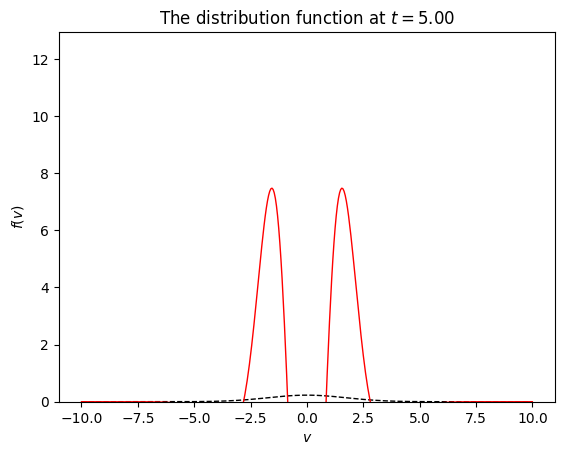

In [7]:
for idx, t_curr in enumerate(arr_t):
    plt.title(f"The distribution function at $t={t_curr:.2f}$")
    plt.plot(_grid_v_1d, _equi_init[0],         'k--', linewidth=1)
    plt.plot(_grid_v_1d, arr_distribution[0, idx], 'r-' , linewidth=1)
    plt.xlabel('$v$')
    plt.ylabel('$f(v)$')
    plt.ylim(0, arr_distribution.max() * 1.05)
    plt.show()
    display.clear_output(wait=True)